In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install scanpy

前処理　この箇所に関しては、多くは『実験医学別冊
独習　Pythonバイオ情報解析』を参照

In [ ]:
import pandas as pd
df = pd.read_csv('/content/GSM2230757_human1_umifm_counts.csv.gz', header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20118,20119,20120,20121,20122,20123,20124,20125,20126,20127
0,NaN,barcode,assigned_cluster,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
1,human1_lib1.final_cell_0001,GATGACGGAC-GGTGGGAT,acinar,0,4,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
2,human1_lib1.final_cell_0002,GAGCGTTGCT-ACCTTCTT,acinar,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,1,0
3,human1_lib1.final_cell_0003,CTTACGGG-CCATTACT,acinar,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,human1_lib1.final_cell_0004,GATGTACACG-TTAAACTG,acinar,0,0,0,0,0,0,0,...,1,0,0,0,0,1,3,1,0,0


In [ ]:
df.iloc[0, 0]='cell'
l_2d = df[:1].values.tolist()
df.columns=l_2d
df.head()

,cell,barcode,assigned_cluster,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
0,cell,barcode,assigned_cluster,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
1,human1_lib1.final_cell_0001,GATGACGGAC-GGTGGGAT,acinar,0,4,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
2,human1_lib1.final_cell_0002,GAGCGTTGCT-ACCTTCTT,acinar,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,1,0
3,human1_lib1.final_cell_0003,CTTACGGG-CCATTACT,acinar,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,human1_lib1.final_cell_0004,GATGTACACG-TTAAACTG,acinar,0,0,0,0,0,0,0,...,1,0,0,0,0,1,3,1,0,0


In [ ]:
df=df[1:]
df.head()

,cell,barcode,assigned_cluster,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
1,human1_lib1.final_cell_0001,GATGACGGAC-GGTGGGAT,acinar,0,4,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
2,human1_lib1.final_cell_0002,GAGCGTTGCT-ACCTTCTT,acinar,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,1,0
3,human1_lib1.final_cell_0003,CTTACGGG-CCATTACT,acinar,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,human1_lib1.final_cell_0004,GATGTACACG-TTAAACTG,acinar,0,0,0,0,0,0,0,...,1,0,0,0,0,1,3,1,0,0
5,human1_lib1.final_cell_0005,GAGATTGCGA-GTCGTCGT,acinar,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
df_data=df.copy()
col=['cell','barcode','assigned_cluster']
df_data=df_data.drop(columns=df.columns[[0,1,2]])
df_data=df_data.astype(int)
df_data.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AA06,AAAS,AACS,AACSP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
1,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
2,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,1,4,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,3,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
df_data.T

,1,2,3,4,5,6,7,8,9,10,...,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,4,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
ZYX,2,4,0,3,1,1,1,1,2,0,...,0,0,0,0,0,0,0,0,1,0
ZZEF1,0,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
ZZZ3,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_data_T=df_data.T
print('Total', len(df_data_T), 'genes, ', len(df_data_T.columns), 'cells')

Total 20125 genes,  1937 cells


In [ ]:
counts = df_data_T.values.sum(axis=0)
n_genes = (df_data_T.values > 0.0).astype(int).sum(axis=0)

In [ ]:
genes_zero_values = df_data_T.index[df_data_T.values.sum(axis=1) == 0]
# genes_zero_valuesに該当する行をすべて削除する
df_data_T.drop(genes_zero_values, inplace=True)

In [ ]:
n_genes = (df_data_T.values > 0.0).astype(int).sum(axis=0)
# counts, n_genesはどちらも細胞の数だけ要素を持つリストなので，
# 最大値（max），最小値（min），平均値（average）を出力してみる
print('Stats for counts: max=', np.max(counts),
      'min=', np.min(counts),
      f'average= {np.average(counts):.2f}')
print('Stats for detected genes: max=', np.max(n_genes),
      'min=', np.min(n_genes),
      f'average= {np.average(n_genes):.2f}')

Stats for counts: max= 32472 min= 1303 average= 5805.23
Stats for detected genes: max= 4903 min= 819 average= 1923.82


In [ ]:
df_anno=df.copy()
df_anno=df.loc[:, col]
df_anno.head()

,cell,barcode,assigned_cluster
1,human1_lib1.final_cell_0001,GATGACGGAC-GGTGGGAT,acinar
2,human1_lib1.final_cell_0002,GAGCGTTGCT-ACCTTCTT,acinar
3,human1_lib1.final_cell_0003,CTTACGGG-CCATTACT,acinar
4,human1_lib1.final_cell_0004,GATGTACACG-TTAAACTG,acinar
5,human1_lib1.final_cell_0005,GAGATTGCGA-GTCGTCGT,acinar


In [ ]:
df_anno.T

,1,2,3,4,5,6,7,8,9,10,...,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937
cell,human1_lib1.final_cell_0001,human1_lib1.final_cell_0002,human1_lib1.final_cell_0003,human1_lib1.final_cell_0004,human1_lib1.final_cell_0005,human1_lib1.final_cell_0006,human1_lib1.final_cell_0007,human1_lib1.final_cell_0008,human1_lib1.final_cell_0009,human1_lib1.final_cell_0010,...,human1_lib3.final_cell_0731,human1_lib3.final_cell_0732,human1_lib3.final_cell_0733,human1_lib3.final_cell_0734,human1_lib3.final_cell_0735,human1_lib3.final_cell_0736,human1_lib3.final_cell_0737,human1_lib3.final_cell_0738,human1_lib3.final_cell_0739,human1_lib3.final_cell_0740
barcode,GATGACGGAC-GGTGGGAT,GAGCGTTGCT-ACCTTCTT,CTTACGGG-CCATTACT,GATGTACACG-TTAAACTG,GAGATTGCGA-GTCGTCGT,AATCCCACG-ATTCGACG,AAAATCGTT-CTCCGCAT,GACTCTTGAC-AAACTGGT,GAGAATTCGT-GTTTGTTT,AGAAGTCC-CCGCTGTT,...,GAGAGCCCAT-TGAAATGA,ATTCCAGAC-GGTCTGAC,GAACACTAAG-TGTAGTTT,CCCATCTG-CGTACCTA,TGACCTGTTAT-GTCTCTCT,GAGAGAGTAT-GATTTACC,TGATTCGCTGG-CTTCTGGA,GCTTACCT-GGCATGCT,CGGCACAT-TGGCCTGT,TGCCTCAC-ACATCTAT
assigned_cluster,acinar,acinar,acinar,acinar,acinar,acinar,beta,acinar,acinar,acinar,...,alpha,beta,beta,beta,alpha,endothelial,beta,endothelial,beta,quiescent_stellate


In [ ]:
df_data.columns

MultiIndex([(  'A1BG',),
            (  'A1CF',),
            (   'A2M',),
            ( 'A2ML1',),
            ('A4GALT',),
            ( 'A4GNT',),
            (  'AA06',),
            (  'AAAS',),
            (  'AACS',),
            ('AACSP1',),
            ...
            ('ZWILCH',),
            ( 'ZWINT',),
            (  'ZXDA',),
            (  'ZXDB',),
            (  'ZXDC',),
            ('ZYG11B',),
            (   'ZYX',),
            ( 'ZZEF1',),
            (  'ZZZ3',),
            (    'pk',)],
           length=20125)

In [ ]:
normalized = 10000 * df_data_T.values / df_data_T.values.sum(axis=0)
lognormalized = np.log1p(normalized)
df_lognormalized = pd.DataFrame(lognormalized, index=df_data_T.index, columns=df_data_T.columns)
df_lognormalized.head()

,1,2,3,4,5,6,7,8,9,10,...,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937
A1BG,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000
A1CF,1.024161,0.0,0.0,0.000000,0.0,0.491668,0.0,0.443686,0.0,0.0,...,0.0,0.0,0.0,1.96924,0.0,0.0,1.791343,0.0,0.0,0.000000
A2M,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,2.035145
A4GALT,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000
AAAS,0.000000,0.0,0.0,0.417482,0.0,0.000000,0.0,0.443686,0.0,0.0,...,0.0,0.0,0.0,1.96924,0.0,0.0,0.000000,0.0,0.0,0.000000


In [ ]:
from sklearn.decomposition import PCA
X_pca=PCA(n_components=500).fit_transform(df_lognormalized.values.T)

# 表示
print('X_pca shape:{}'.format(X_pca.shape))

X_pca shape:(1937, 500)


In [ ]:
num=[]
result = []
for num in range(500):
  num='pc'+str(num)
  result.append(num)

In [ ]:
newvalue = pd.DataFrame(X_pca)
newvalue.columns =result
newvalue.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc490,pc491,pc492,pc493,pc494,pc495,pc496,pc497,pc498,pc499
0,15.405710,19.457679,8.907150,-4.943010,2.547060,-6.987169,-3.413175,6.383957,4.427898,0.344250,...,-0.563681,0.186962,-0.470456,0.362004,0.301626,0.627358,0.947887,-0.423684,0.365176,0.397104
1,16.525339,17.425346,11.861085,-6.046415,0.873928,-4.635021,-4.004017,5.029261,4.593369,1.063532,...,-0.119111,0.210002,-0.228189,0.062457,0.082055,0.402766,-0.028683,-0.275300,0.252594,-0.087171
2,13.629085,25.319475,3.179988,-1.135792,3.845256,-4.891228,-1.464833,5.048526,2.154591,-0.241721,...,1.248590,0.102107,0.217876,-0.190333,0.342947,0.358174,0.577012,0.024807,0.038836,-0.398183
3,16.225208,20.844602,8.056089,-3.927344,2.214547,-3.870224,-2.799898,4.379023,2.991965,1.506128,...,0.214685,-0.364875,0.240295,-0.211365,-0.619383,0.168693,0.689581,0.278001,-0.063799,-0.419640
4,16.584984,19.551555,8.888608,-4.156507,1.270138,-4.309086,-2.388516,4.043758,3.149664,-0.260052,...,-0.114975,0.581885,-0.552530,0.389408,0.299093,-0.355459,0.011590,0.429914,-0.421977,-0.334843


In [ ]:
df_anno=df_anno.reset_index()

In [ ]:
newvalue=newvalue.join(df_anno)
newvalue.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc494,pc495,pc496,pc497,pc498,pc499,"(index,)","(cell,)","(barcode,)","(assigned_cluster,)"
0,15.405710,19.457679,8.907150,-4.943010,2.547060,-6.987169,-3.413175,6.383957,4.427898,0.344250,...,0.301626,0.627358,0.947887,-0.423684,0.365176,0.397104,1,human1_lib1.final_cell_0001,GATGACGGAC-GGTGGGAT,acinar
1,16.525339,17.425346,11.861085,-6.046415,0.873928,-4.635021,-4.004017,5.029261,4.593369,1.063532,...,0.082055,0.402766,-0.028683,-0.275300,0.252594,-0.087171,2,human1_lib1.final_cell_0002,GAGCGTTGCT-ACCTTCTT,acinar
2,13.629085,25.319475,3.179988,-1.135792,3.845256,-4.891228,-1.464833,5.048526,2.154591,-0.241721,...,0.342947,0.358174,0.577012,0.024807,0.038836,-0.398183,3,human1_lib1.final_cell_0003,CTTACGGG-CCATTACT,acinar
3,16.225208,20.844602,8.056089,-3.927344,2.214547,-3.870224,-2.799898,4.379023,2.991965,1.506128,...,-0.619383,0.168693,0.689581,0.278001,-0.063799,-0.419640,4,human1_lib1.final_cell_0004,GATGTACACG-TTAAACTG,acinar
4,16.584984,19.551555,8.888608,-4.156507,1.270138,-4.309086,-2.388516,4.043758,3.149664,-0.260052,...,0.299093,-0.355459,0.011590,0.429914,-0.421977,-0.334843,5,human1_lib1.final_cell_0005,GAGATTGCGA-GTCGTCGT,acinar


Text(0, 0.5, 'PC2')

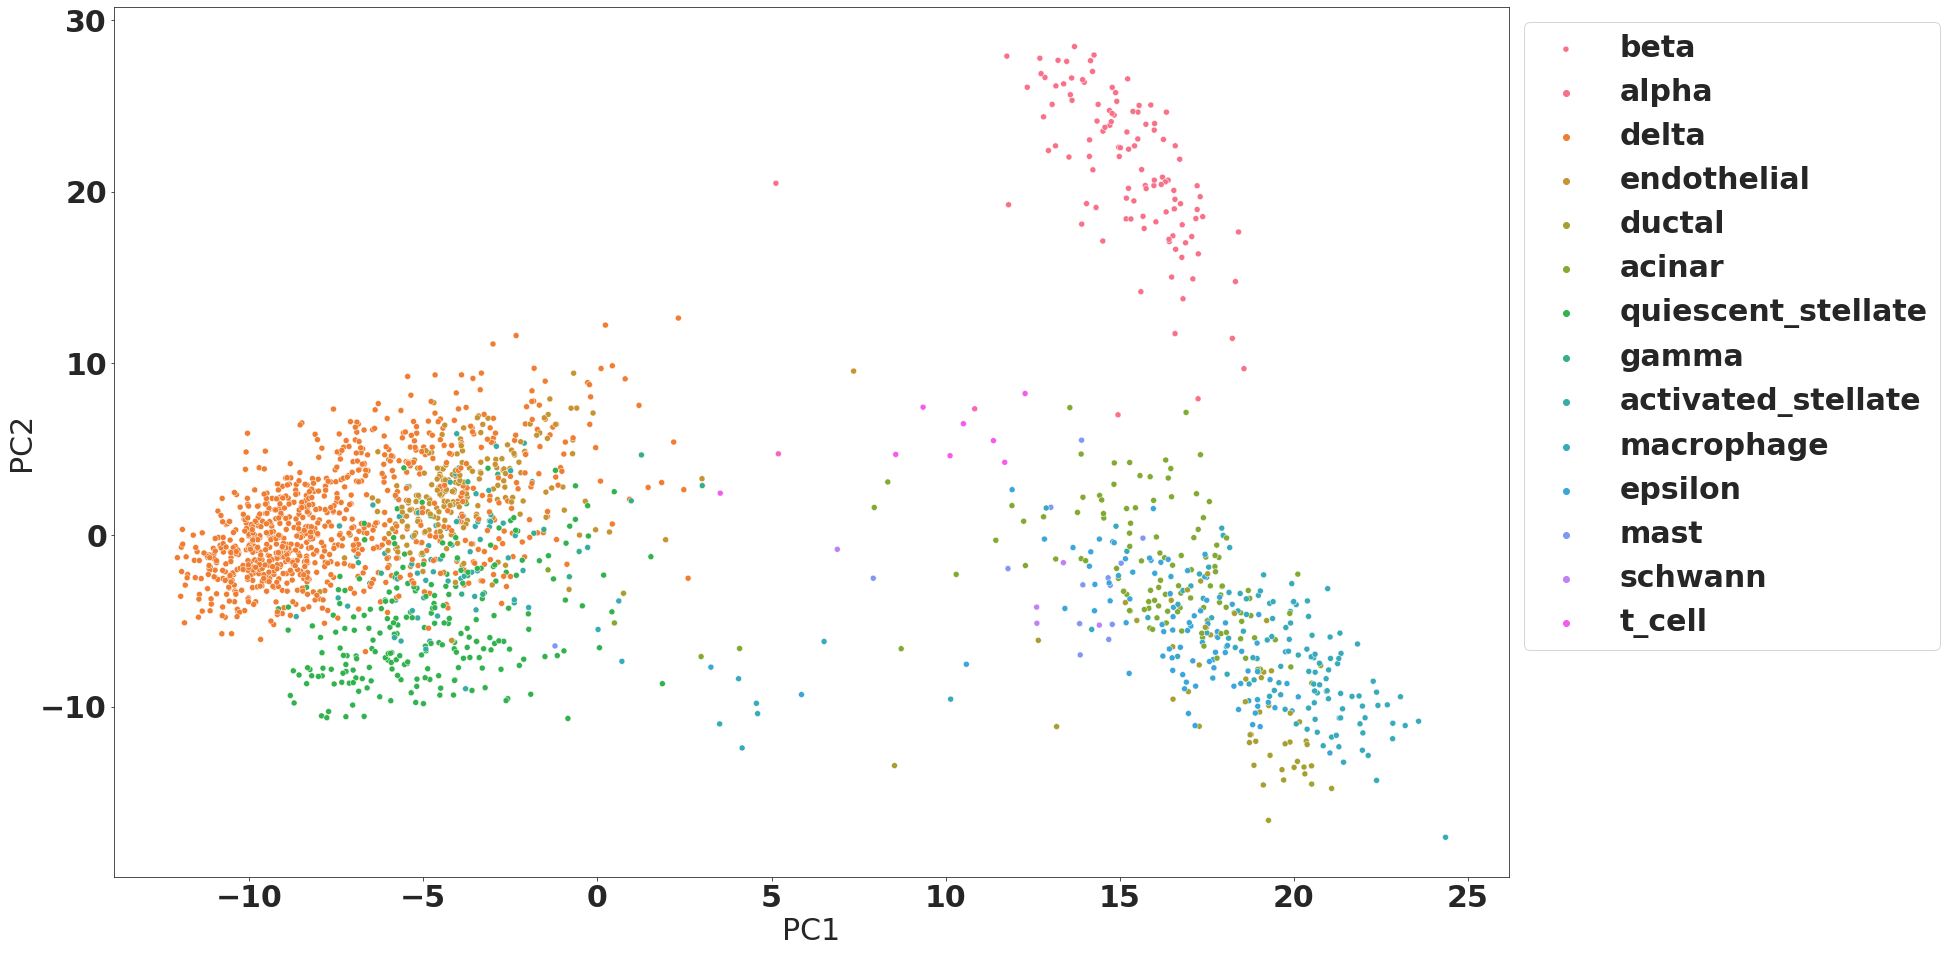

In [ ]:
plotdata = newvalue.loc[:,newvalue.columns]

# 答えのラベルを追加
plotdata["label"] = df_anno[('assigned_cluster',)]

import seaborn as sns

# 図示
plt.figure(figsize=(25,16))
sns.scatterplot(data = plotdata, x= "pc0", y= "pc1", hue = "label")
plt.legend(labels = plotdata["label"].value_counts().index.to_list(),loc = 2, bbox_to_anchor = (1,1))
plt.xlabel("PC1")
plt.ylabel("PC2")

t-SNE PCAで500に落としてから実装している

In [ ]:
from sklearn.manifold import TSNE
df_1_TSNE = TSNE(n_components=2, random_state=0).fit_transform(X_pca) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
newvalue = pd.DataFrame(df_1_TSNE)
newvalue=newvalue.join(df_anno)
newvalue

,0,1,"(index,)","(cell,)","(barcode,)","(assigned_cluster,)"
0,-1.335414,-26.953726,1,human1_lib1.final_cell_0001,GATGACGGAC-GGTGGGAT,acinar
1,-0.949052,-26.644224,2,human1_lib1.final_cell_0002,GAGCGTTGCT-ACCTTCTT,acinar
2,-2.945456,-28.233667,3,human1_lib1.final_cell_0003,CTTACGGG-CCATTACT,acinar
3,-1.489090,-27.356470,4,human1_lib1.final_cell_0004,GATGTACACG-TTAAACTG,acinar
4,-1.218645,-26.782064,5,human1_lib1.final_cell_0005,GAGATTGCGA-GTCGTCGT,acinar
...,...,...,...,...,...,...
1932,0.877388,-7.133789,1933,human1_lib3.final_cell_0736,GAGAGAGTAT-GATTTACC,endothelial
1933,0.916340,-1.273552,1934,human1_lib3.final_cell_0737,TGATTCGCTGG-CTTCTGGA,beta
1934,0.873008,-12.627995,1935,human1_lib3.final_cell_0738,GCTTACCT-GGCATGCT,endothelial
1935,-5.932778,11.598931,1936,human1_lib3.final_cell_0739,CGGCACAT-TGGCCTGT,beta


Text(0, 0.5, '')

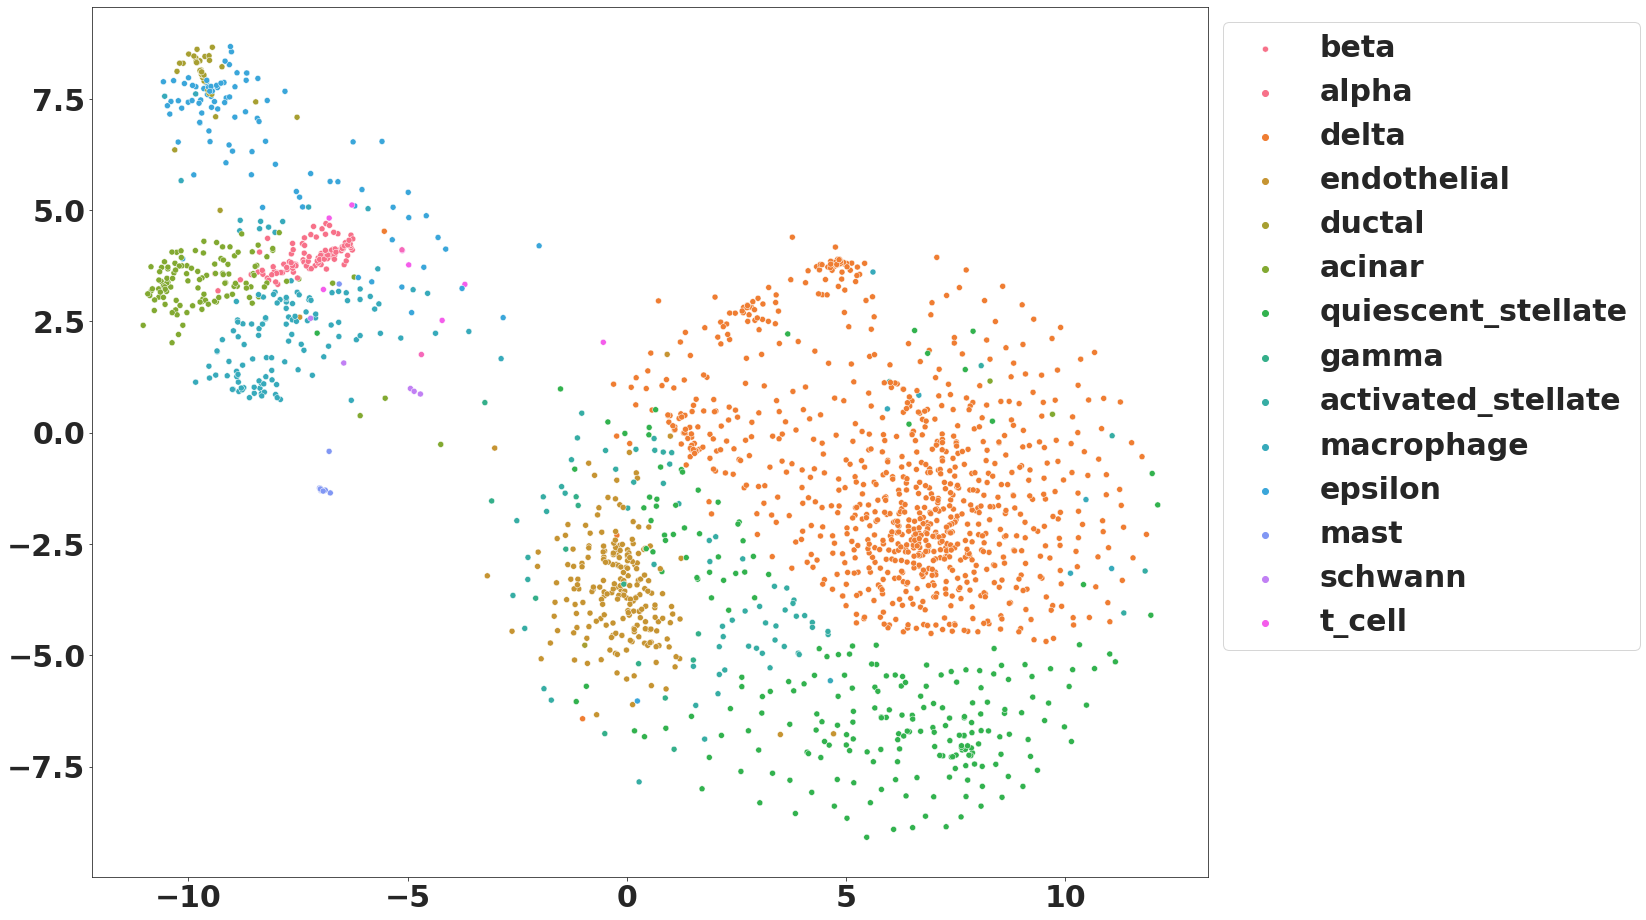

In [ ]:
plotdata = newvalue.loc[:,newvalue.columns]

# 答えのラベルを追加
plotdata["label"] = df_anno[('assigned_cluster',)]

import seaborn as sns

# 図示
plt.figure(figsize=(20,16))
sns.scatterplot(data = plotdata, x= "pc0", y= "pc1", hue = "label")
plt.legend(labels = plotdata["label"].value_counts().index.to_list(),loc = 2, bbox_to_anchor = (1,1))
plt.xlabel("")
plt.ylabel("")

In [ ]:
newvalue.to_csv('newvalue_再現.csv')

In [ ]:
newvalue=df_lognormalized.T
newvalue.join(df_obs)
newvalue.to_csv("seimei.txt", sep=",")
col=['cell_type','condition']
newvalue[col].to_csv("seimei_label.txt", sep=",")

In [ ]:
import config
from vasc_dev import vasc
import numpy as np
from helpers import clustering,measure,print_2D
from config import config
from vasc_dev import vasc

In [ ]:
if __name__ == '__main__':
    DATASET = 'seimei' #sys.argv[1]
    PREFIX = 'seimei' #sys.argv[2]
    
    filename = DATASET+'.txt'
    data = open( filename )
    head = data.readline().rstrip(',').split(',')
    
    label_file = open( DATASET+'_label.txt' )
    label_dict = {}
    for line in label_file:
        temp = line.rstrip(',').split(',')
        label_dict[temp[0]] = temp[1]
    label_file.close()
    
    label = []
    for c in head:
        if c in label_dict.keys():
            label.append(label_dict[c])
        else:
            print(c)
    
    label_set = []
    for c in label:
        if c not in label_set:
            label_set.append(c)
    name_map = {value:idx for idx,value in enumerate(label_set)}
    id_map = {idx:value for idx,value in enumerate(label_set)}
    label = np.asarray( [ name_map[name] for name in label ] )
    
    expr = []
    for line in data:
        temp = line.rstrip().split()[1:]
        temp = [ float(x) for x in temp]
        expr.append( temp )
    
    expr = np.asarray(expr).T
    n_cell,_ = expr.shape
    if n_cell > 150:
        batch_size=config['batch_size']
    else:
        batch_size=32 

    for i in range(1):
        res = vasc( expr,var=False,
                    latent=config['latent'],
                    annealing=False,
                    batch_size=batch_size,
                    prefix=PREFIX,
                    label=label,
                    scale=config['scale'],
                    patience=config['patience'] 
                )

        k = len( np.unique(label) )
        cl,_ = clustering( res,k=k)
        dm = measure( cl,label )
 

In [ ]:
newvalue = pd.DataFrame(res)
newvalue=newvalue.join(df_anno)
newvalue

,0,1,"(index,)","(cell,)","(barcode,)","(assigned_cluster,)"
0,-4.947578,-10.685259,1,human1_lib1.final_cell_0001,GATGACGGAC-GGTGGGAT,acinar
1,-4.627500,-12.820337,2,human1_lib1.final_cell_0002,GAGCGTTGCT-ACCTTCTT,acinar
2,-6.565508,-7.344081,3,human1_lib1.final_cell_0003,CTTACGGG-CCATTACT,acinar
3,-4.988894,-11.200729,4,human1_lib1.final_cell_0004,GATGTACACG-TTAAACTG,acinar
4,-5.257387,-11.647261,5,human1_lib1.final_cell_0005,GAGATTGCGA-GTCGTCGT,acinar
...,...,...,...,...,...,...
1932,12.054920,-5.953183,1933,human1_lib3.final_cell_0736,GAGAGAGTAT-GATTTACC,endothelial
1933,-9.695759,1.875878,1934,human1_lib3.final_cell_0737,TGATTCGCTGG-CTTCTGGA,beta
1934,7.850119,-5.333431,1935,human1_lib3.final_cell_0738,GCTTACCT-GGCATGCT,endothelial
1935,-9.659688,3.196600,1936,human1_lib3.final_cell_0739,CGGCACAT-TGGCCTGT,beta


In [ ]:
newvalue.to_csv('newvalue_ronbun再現.csv')